<a href="https://colab.research.google.com/github/Epilef86/Recomendacoes_/blob/main/Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O que é um grafo ?

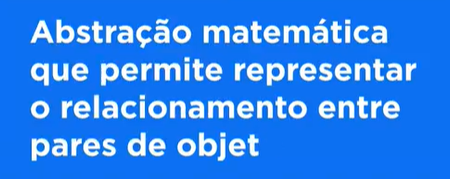

Geralmente num grafo nós temos que o relacionamento entre esses vértices são representados por uma aresta.Exemplos de grafos:

1- Redes sociais: pessoas sendo os vértices ou nós do grafo e a conexão entre as pessoas, uma conexão de amizade ou uma conexão em que uma pessoa conhece a outra é representada como uma aresta entre essas duas pessoas;

2- Links da web: sites que apontam uns para os outros, então se vc tem um site que tem um link pra um determinado site isso quer dizer que o grafo aonde os vértices são os sites são preecnhidos com aresta justamente com esses links entre esse sites;

3- Citações de artigos: os artigos são os nós e os artigos que se referenciam tem uma aresta em comum entre si;

4- Redes neurais: os neuros como vértices e ai se tem uma rede densamente conectada se forma um grafo de redes neurais

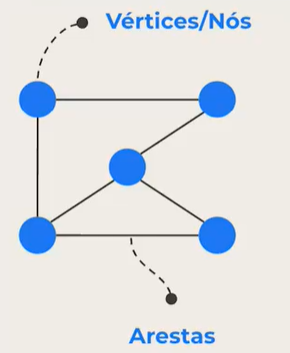

Como se utiliza grafo em sistemas de recomendações?

Geralmente temos um grafo formado por vértice do tipo usuário ou do tipo item, ou seja, um grafo bipartido. Em que uma parte dos vértices é de uma determinada entidade e a outra parte é representada por itens, sendo que vértices da mesma categoria não se conectam. ]Exemplo, se um usuário consumiu um determinado tipo de item existem uma aresta ligando esse usuário para aquele item que ele consumiu

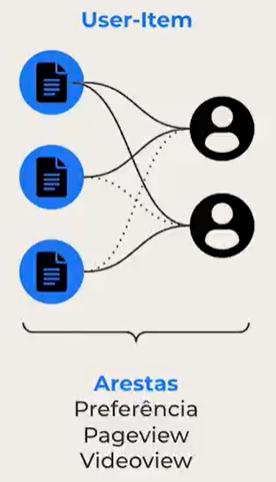

Essas arestas podem ser a preferência do usuário, se o usuário consumiu um determinado item eles são ligados por uma aresta. Essa aresta pode ser um pageview. Se vc navegou em uma página da web no grafo vc terá uma aresta conectando vc a essa aresta ou um videview, se vc viu um vídeo terá uma aresta ligando vc a um nó do vídeo. 

O problema de recomendação passa a ser como estimar as arestas que estão faltando nesse grafo, então se vc nunca viu um determinado item ou não consumiu o problema de recomendação passa a ser qual a probabilidade daquela aresta existir ou haver uma conexão entre um nó do tipo item com o nó do tipo usuário. 

Também existe grafo item-item ou grafo usuário-usuário:

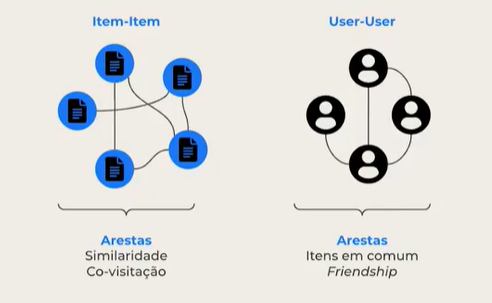

O item-item pode ser representados aonde os nós são os items e as arestas similaridade ou atpe mesmo a Co-visitação, exemplo: se 2 itens são co-visitados por uma gama de usuários vai existir uma aresta entre os itens A e B pq vc co-visitou esses dois itens. A mesma coisa entre os usuários, se dois usuários consumiram o mesmo item então conseguimos colocar uma aresta entre esses usuários pq eles tem algum grau de similaridade em comum entre eles, exemplo: redes sociais, se vc segue uma pessoa ou é amiga vc terá umma aresta ligando vc ao vértice daquela pessoa

Um dos algoritmos ue ficaram bastante famosos foi o algoritmo do pagerank 

Se temos um grafo de usuário e item, vemos que são os visinhos desse item alvo ou seja, quem foram as pessoas que consumiram esse item, isso vai fazer com que se chegue nos usuários que consumiram esse item, se pegarmos os itens vizinhos desses usuários vemos quem são os itens que estao em comum, que tem uma co-visitação entre esses diferentes tipos de itens, conseguimos utilizar como scrore a quantidade de usuários em comum que assistiram dois tipos de itens.

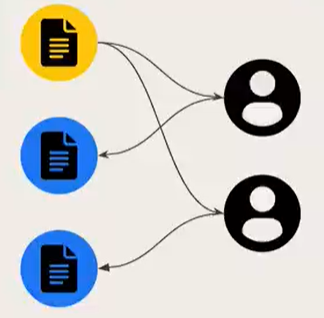

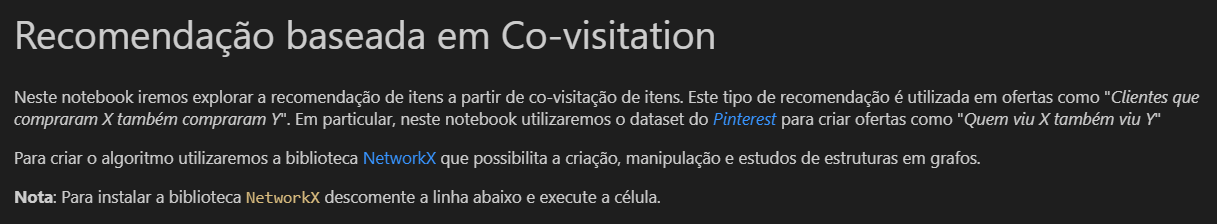

In [18]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import os
import pandas as pd
from google.colab import files
from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#007efd', '#FFC000', '#303030'])

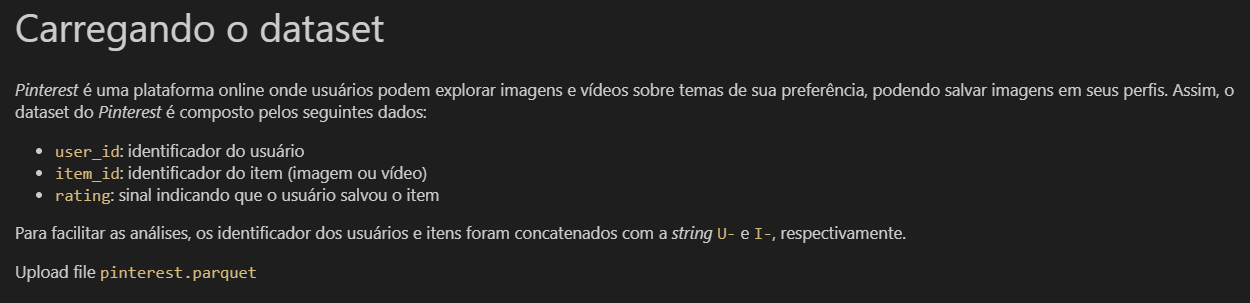

In [20]:
%%time
_ = files.upload() # approx: 30s

Saving pinterest.parquet to pinterest (2).parquet
CPU times: user 2.25 s, sys: 245 ms, total: 2.49 s
Wall time: 2min 35s


O rating vai ser tudo 1 pq ele só indica que um determinado usuário salvou um determinado item.

In [21]:
filepath = './pinterest.parquet'

df = pd.read_parquet(filepath)
df.tail()

,user_id,item_id,rating
1445617,U-55186,I-5448,1
1445618,U-55186,I-4615,1
1445619,U-55186,I-5346,1
1445620,U-55186,I-2803,1
1445621,U-55186,I-4207,1


Extrai algumas estatísticas bem rápidas desse dataframe, nº de usuário,nº de itens e nº avaliações utilizando os métidos de pandas.

.nunique() pra pegar o numero de usuários distintos

In [22]:
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()
n_ratings = df[['user_id', 'item_id']].drop_duplicates().shape[0]

print (f'#Usuários: {n_users}')
print (f'#Itens: {n_items}')
print (f'#Avaliações: {n_ratings}')

#Usuários: 55187
#Itens: 9911
#Avaliações: 1408394


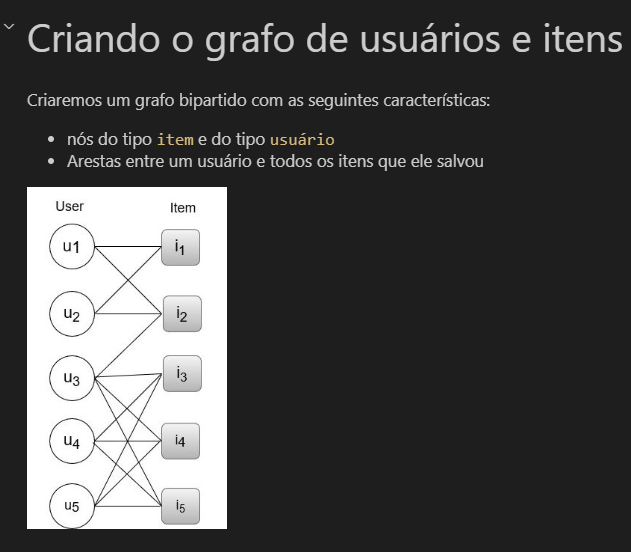

Se um usuário salvou um item teremos uma aresta ligando o usuário ao item

Para trabalhar com a biblioteca do NetwprKx precisamos colocar import networkx as nx.

Pra criar um grafo:

.Graph() instancia um grafo;

G.add_nodes_from(df['item_id'].unique(), node_type='item') preencher os nós do tipo item. Este método está passando pra Network quais são os nós distintos do tipo item que vai adicionar ao gráfico.



G.add_weighted_edges_from(df[['user_id', 'item_id', 'rating']].values) # [[no_1, no_2, peso]] adiciona as arestas com nós e seus pesos. 

In [23]:
G = nx.Graph()
G.add_nodes_from(df['item_id'].unique(), node_type='item')
G.add_nodes_from(df['user_id'].unique(), node_type='user')
G.add_weighted_edges_from(df[['user_id', 'item_id', 'rating']].values) # [[no_1, no_2, peso]]

In [24]:
G 

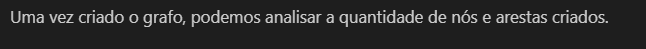

Números de nós

In [25]:
# Number of nodes
G.number_of_nodes()

65098

Número de arestas

In [26]:
# Number of edges
G.number_of_edges()

1408394

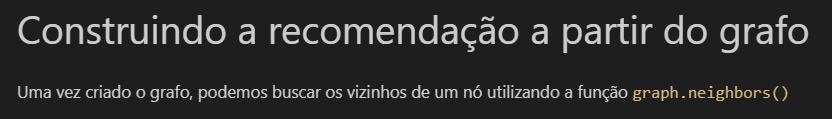

Se passarmos o identificador de um nó, teremos os vizinhos que se conectam a esses nós.Ou seja, são os usuários que consumiram esse item 

In [27]:
item_id = df['item_id'][0]
neighbors = G.neighbors(item_id)
list(neighbors)[:5]

['U-0', 'U-56', 'U-347', 'U-365', 'U-454']

Vai ter todos os items que esse usuário salvou

In [28]:
user_id = df['user_id'][0]
neighbors = G.neighbors(user_id)
list(neighbors)[:5]

['I-2', 'I-3', 'I-4', 'I-5', 'I-6']

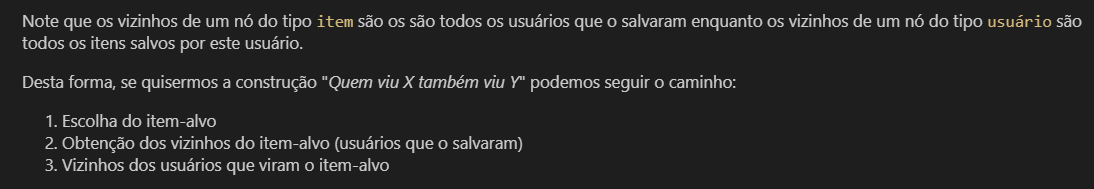

O pivô é o item_id, então a primeira coisa que precismos é pegar os vizinhos desse item que são os usuários que consumiram.
Para cada usuário vizinho desse item vamos ter que pegar os items que esse usuário consumiu então vamos criar uma lista cazia de itens consumidos pelos vizinhos e pra cada usuário na vizinhança pegaremos os vizinhos desses usuários e vamos concatenar na lista de itens consumidos pelos vizinhos de um item alvo.

In [29]:
item_id = 'I-5448'
neighbors = G.neighbors(item_id)

neighbor_consumed_items = []
for user_id in neighbors:
    user_consumed_items = G.neighbors(user_id)
    neighbor_consumed_items += list(user_consumed_items)

print ('Quem viu {} também viu: {}'.format(item_id, ','.join(neighbor_consumed_items[:20])))

Quem viu I-5448 também viu: I-5186,I-4665,I-2937,I-1751,I-3010,I-5445,I-5446,I-5447,I-5444,I-5237,I-356,I-4139,I-4020,I-5449,I-3979,I-2991,I-4021,I-5450,I-3104,I-5448


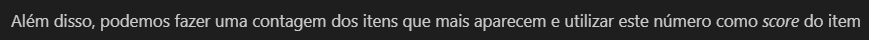

Para passar uma lista pra Counter ele mostra dentro da lista o elemento I - 7480 apareceu duas vezes, e assim por diante

In [30]:
consumed_items_count = Counter(neighbor_consumed_items)
consumed_items_count

Counter({'I-5186': 3,
         'I-4665': 1,
         'I-2937': 1,
         'I-1751': 4,
         'I-3010': 1,
         'I-5445': 1,
         'I-5446': 1,
         'I-5447': 1,
         'I-5444': 1,
         'I-5237': 2,
         'I-356': 3,
         'I-4139': 1,
         'I-4020': 1,
         'I-5449': 2,
         'I-3979': 1,
         'I-2991': 1,
         'I-4021': 2,
         'I-5450': 4,
         'I-3104': 3,
         'I-5448': 95,
         'I-5980': 1,
         'I-2706': 2,
         'I-4615': 2,
         'I-3966': 2,
         'I-2050': 1,
         'I-264': 1,
         'I-5981': 5,
         'I-5333': 1,
         'I-5973': 1,
         'I-5982': 1,
         'I-5983': 1,
         'I-3023': 4,
         'I-5804': 2,
         'I-3272': 1,
         'I-893': 1,
         'I-5984': 2,
         'I-832': 3,
         'I-2900': 2,
         'I-4995': 1,
         'I-1276': 1,
         'I-5941': 3,
         'I-79': 1,
         'I-425': 1,
         'I-4289': 1,
         'I-5968': 1,
         'I-6693

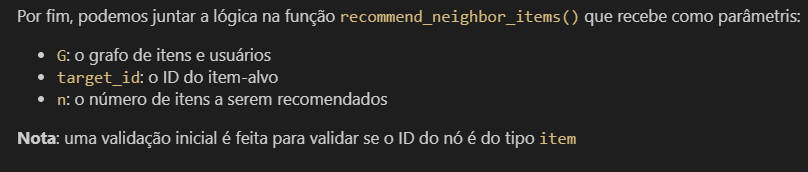

A função recommend_neighbor_items recebe um grafo que tem os nós do tipo item, usuário e as aresta e um target ID, que vai ser o pivô e por fim o números de itens que essa função vai retornar. No final queremos os itens como indices e o score como valores de uma coluna

Zip pega o 1º item de uma lista e integra com 1º elemento da segunda lista e assim por diante...ela é um interador de cada um desses pares de elemento.

In [31]:
def recommend_neighbor_items(G:nx.Graph, target_id, n=10):
    # Validando tipo do nó
    node_type = nx.get_node_attributes(G, 'node_type')[target_id]
    if node_type != 'item':
        raise ValueError('Node is not of item type.')

    # Analisando consumo dos usuários vizinhos
    neighbor_consumed_items = []
    for user_id in G.neighbors(target_id):
        user_consumed_items = G.neighbors(user_id)
        neighbor_consumed_items +=list(user_consumed_items)

    # Contabilizando itens consumidos pelos vizinhos
    consumed_items_count = Counter(neighbor_consumed_items)

    # Criando dataframe
    df_neighbors = pd.DataFrame(zip(consumed_items_count.keys(), consumed_items_count.values()))
    df_neighbors.columns = ['item_id', 'score']
    df_neighbors = df_neighbors.sort_values(by='score', ascending=False).set_index('item_id')
    return df_neighbors.head(n)

recommend_neighbor_items(G, 'I-5185', n=10)

,score
item_id,
I-5185,144
I-6618,28
I-3705,26
I-5942,24
I-5941,23
I-6080,23
I-4175,21
I-4003,21
I-6594,21


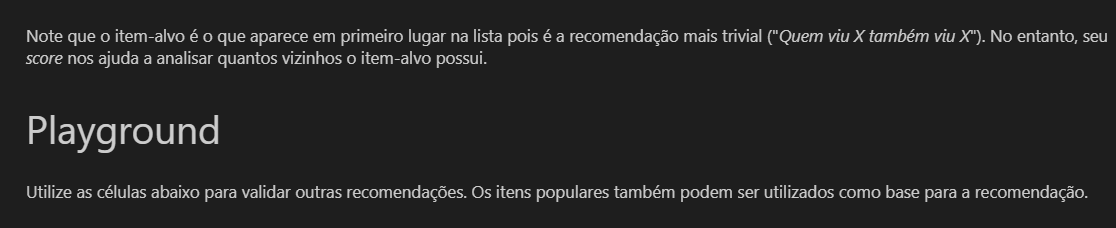

Para isso precisamos contabilizar quantos usuários consumiram um determinado item_id e ordena de forma decrescente

In [32]:
# Popular items
df.groupby('item_id')['user_id'].count().sort_values(ascending=False).head().index

Index(['I-487', 'I-442', 'I-773', 'I-3831', 'I-13'], dtype='object', name='item_id')

In [33]:
recommend_neighbor_items(G, 'I-487')

,score
item_id,
I-487,1544
I-773,170
I-817,153
I-931,150
I-877,139
I-495,130
I-1203,127
I-1198,127
I-485,125


Aqui diz que esse item tiveram 1544 usuários que também viram ele e o item I-487